In [178]:
import pandas as pd
import numpy as np


class Survivors:


  def __init__(self, path):
    self.df = pd.read_csv(path)


  def survive_histo(column: str):          # Попытка сделать функцию, которая рисует графики Total/Survived == 1
    unique_values = survivors.df[column].nunique()

    bins = unique_values + 2

    survivors.df[column].hist(bins=bins, grid=False, edgecolor='black', legend = True)
    survivors.df[column][survivors.df.Survived == 1].hist(bins=bins, grid=False, edgecolor='black', legend = True)

In [179]:
survivors = Survivors("/content/drive/MyDrive/train.csv")

In [180]:
survivors.df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
survivors.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [182]:
survivors.df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [183]:
survivors.df[[ "Age", "Pclass",]].agg([ "count", "mean"])

,Age,Pclass
count,714.000000,891.000000
mean,29.699118,2.308642


In [184]:
survivors.df[['Survived' ,'Pclass']].groupby(['Survived']).agg(['count', 'mean'])

Pclass          
          count      mean
Survived                 
0           549  2.531876
1           342  1.950292

In [185]:
survivors.df[['Survived' ,'Pclass']].groupby(['Pclass']).agg(["count", "sum", "mean"])

Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

<Axes: >

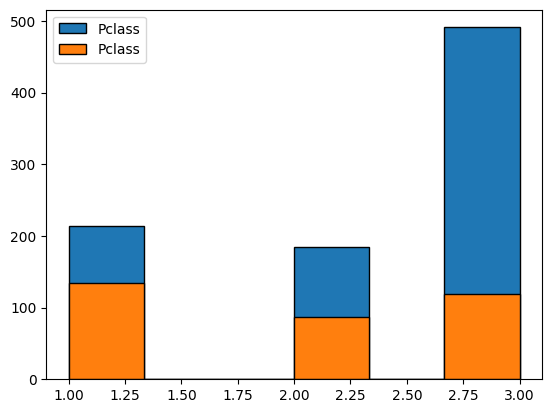

In [250]:
survivors.df['Pclass'].hist(bins = len('Pclass'), grid = False, edgecolor = 'black', legend = True)
survivors.df['Pclass'][survivors.df.Survived == 1].hist(bins = len('Pclass'), grid = False, edgecolor = 'black', legend = True)

Вывод: выживание напрямую зависело от класса: чем выше класс каюты - тем выше выживаемость

In [187]:
female = survivors.df.loc[survivors.df.Sex == 'female']["Survived"]
survived_female = sum(female)/len(female)

print(f"Процент выживших женщин: {round(survived_female * 100, 2)} %")

male = survivors.df.loc[survivors.df.Sex == 'male']["Survived"]
survived_male = sum(male)/len(male)

print(f"Процент выживших мужчин: {round(survived_male * 100, 2)} %")

Процент выживших женщин: 74.2 %
Процент выживших мужчин: 18.89 %


In [188]:
survivors.df[['Survived' ,'Sex']].groupby(['Sex']).agg(['count', 'sum', 'mean'])

Survived               
          count  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

<Axes: >

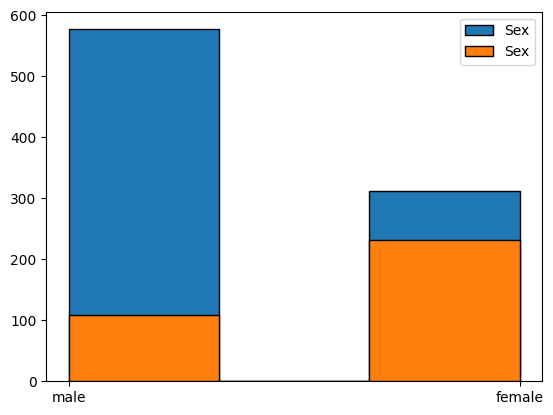

In [272]:
survivors.df['Sex'].hist(bins = len('Sex'), grid = False, edgecolor = 'black', legend = True)
survivors.df['Sex'][survivors.df.Survived == 1].hist(bins = len('Sex'), grid = False, edgecolor = 'black', legend = True)

Вывод: женщины выживали гораздо чаще, чем мужчины. Скорее всего, причина в том, что в первую очередь спасали женщин и детей.

In [280]:
max_age = survivors.df['Age'].max()
max_age = int(max_age)

age_range = range(0, max_age + 6, 5)
age_intervals = []
for i in bins[:-1]:
  interval = f"{i} - {i + 5}"
  age_intervals.append(interval)

survivors.df['Age Group'] = pd.cut(survivors.df['Age'], bins = age_range, labels = age_intervals, right=False)

survivors.df[['Survived', 'Age Group']].groupby(['Age Group']).agg(["count", "sum", "mean"]).reset_index()

<ipython-input-280-8623950055de>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors.df[['Survived', 'Age Group']].groupby(['Age Group']).agg(["count", "sum", "mean"]).reset_index()


Age Group Survived              
                count sum      mean
0      0 - 5       40  27  0.675000
1     5 - 10       22  11  0.500000
2    10 - 15       16   7  0.437500
3    15 - 20       86  34  0.395349
4    20 - 25      148  73  0.493243
5    25 - 30      212  42  0.198113
6    30 - 35      102  40  0.392157
7    35 - 40       85  46  0.541176
8    40 - 45       64  18  0.281250
9    45 - 50       41  16  0.390244
10   50 - 55       32  14  0.437500
11   55 - 60       16   6  0.375000
12   60 - 65       14   5  0.357143
13   65 - 70        4   0  0.000000
14   70 - 75        6   0  0.000000
15   75 - 80        0   0       NaN
16   80 - 85        1   1  1.000000

<Axes: >

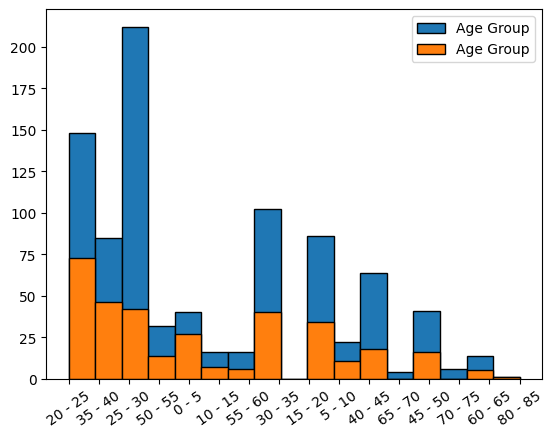

In [279]:
# Как установить правильный порядок? Как подтянуть длину таблицы как bins для гистограммы?

survivors.df['Age Group'].hist(bins = 17, grid = False, edgecolor = 'black', legend = True, xrot = 35)
survivors.df['Age Group'][survivors.df.Survived == 1].hist(bins = 17, grid = False, edgecolor = 'black', legend = True)

Вывод: Выживаемость группы детей от 0 до 5 лет выше, чем всех остальных возрастных групп. Может быть связано с предыдущем выводе, об эвакуации женщин и детей на руках.
Также, выживаемость группы 25 - 30 лет ощутимо ниже, чем остальных.

In [258]:
survivors.df['Age Group'].reset_index()

,index,Age Group
0,0,20 - 25
1,1,35 - 40
2,2,25 - 30
3,3,35 - 40
4,4,35 - 40
...,...,...
884,886,25 - 30
885,887,15 - 20
886,888,25 - 30
887,889,25 - 30


In [191]:
# заполняем пустые поля Age эстимированными значениями по Survived/Pclass. Могло бы пригодится, как ликвидация нулевых значений

mean_s1p1 = survivors.df[(survivors.df.Survived == 1) & (survivors.df.Pclass == 1)].Age.mean()
mean_s1p2 = survivors.df[(survivors.df.Survived == 1) & (survivors.df.Pclass == 2)].Age.mean()
mean_s1p3 = survivors.df[(survivors.df.Survived == 1) & (survivors.df.Pclass == 3)].Age.mean()
mean_s0p1 = survivors.df[(survivors.df.Survived == 0) & (survivors.df.Pclass == 1)].Age.mean()
mean_s0p2 = survivors.df[(survivors.df.Survived == 0) & (survivors.df.Pclass == 2)].Age.mean()
mean_s0p3 = survivors.df[(survivors.df.Survived == 0) & (survivors.df.Pclass == 3)].Age.mean()

survivors.df.loc[(survivors.df['Age'].isnull()) & (survivors.df['Survived'] == 1) & (survivors.df['Pclass'] == 1), 'Age'] = mean_s1p1
survivors.df.loc[(survivors.df['Age'].isnull()) & (survivors.df['Survived'] == 1) & (survivors.df['Pclass'] == 2), 'Age'] = mean_s1p2
survivors.df.loc[(survivors.df['Age'].isnull()) & (survivors.df['Survived'] == 1) & (survivors.df['Pclass'] == 3), 'Age'] = mean_s1p3
survivors.df.loc[(survivors.df['Age'].isnull()) & (survivors.df['Survived'] == 0) & (survivors.df['Pclass'] == 1), 'Age'] = mean_s0p1
survivors.df.loc[(survivors.df['Age'].isnull()) & (survivors.df['Survived'] == 0) & (survivors.df['Pclass'] == 2), 'Age'] = mean_s0p2
survivors.df.loc[(survivors.df['Age'].isnull()) & (survivors.df['Survived'] == 0) & (survivors.df['Pclass'] == 3), 'Age'] = mean_s0p3

In [192]:
# Удаляем Cabin из-за огромного количества пропусков, а также 2 значения без точки отправления т.к. они не повлияют на анализ

del survivors.df["Cabin"]

survivors.df.dropna(inplace=True)

In [193]:
survivors.df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
